# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

# Einleitung

#### Dieser Beericht beschäftigt sich mit der Frage welche Auswirkungen die systematische Abweichung eines einzelnen Systemparameters haben kann, selbst wenn dieser noch in den zulässigen Toleranzen liegt.
#### Dazu werden die eingangs gestellten Fragen sukzessive abgearbeitet und, wie im ersten Assignment, am Beispiel eines Federspeichers untersucht.
#### Zur Untersuchung der Auswirkungen wird nur der Parameter c3 variiert, alle anderen Parameter bleiben unberührt.
#### Alle Eingangsgrößen sind stochastisch unabhängig und gleichverteilt.

# Analyse

#### Alle Zwischenschritte sind ausführlich dokumentiert. Zwischenergebnisse werden graphisch dargestellt und in Zahlenwerten ausgegeben. Am Ende jeder Aufgabe erfolgt ihre Beantwortung in einem kurzen Antwortsatz. 
#### Eine Zusammenfassung der Ergebnisse findet sich am Ende der Analyse.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Anzahl Federn
N = int(1e6)

In [3]:
#fixierter random Generator für reproduzierbare Zufallszahlen
rng = np.random.default_rng(42)
#Größe der Arrays der Federn - Nx8 
S = (N,8)
#Größe der Arrays der Zylinder - Nx1 
P = (N,1)

### Aufgabe 1.a

In [4]:
#Toleranzbänder der Federn, gleichverteilt
c1 = rng.uniform(low =80, high = 120, size = S)
c2 = rng.uniform(low =120, high = 180, size = S)
c3 = rng.uniform(low =160, high = 240, size = S)

In [5]:
#Gesamt Federsteifigkeit der Federpakete
c = np.sum (c1, axis = 1)+np.sum (c2, axis = 1)+np.sum (c3, axis = 1)

In [6]:
#print(c)

Text(0.5, 0, '$c$/(kN/m)')

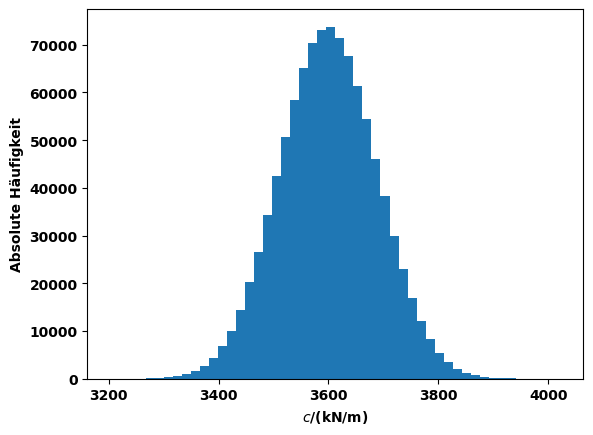

In [7]:
#Histogramm von c
nbins = 50    # Zusammenfassen der Werte in 50 Teilpakete, erhöhen für bessere Auflösung
plt.hist(c, density = False, bins = nbins)
plt.ylabel('Absolute Häufigkeit')
plt.xlabel('$c$/(kN/m)')

In [8]:
print('Mean value:          ' + str(np.round(np.mean(c))))
print('Standard dev.:       ' + str(np.round(np.std(c))))
print('99% of realisations: ' + str(np.round(np.mean(c)-3*np.std(c))) + '...' + str(np.round(np.mean(c)+3*np.std(c)))) 

Mean value:          3600.0
Standard dev.:       88.0
99% of realisations: 3336.0...3864.0


#### Im nominalen Zustand verhalten sich die Federpakete entsprechend einer Normalverteilung mit einem Mittelwert von 3600 kN/m und einer Standardabweichung von 88 kN/m. 99% der Werte liegen im Intervall 3336 kN/m - 3864 kN/m.

### Aufgabe 1.b

In [9]:
#neue Toleranzbänder der Federn - c3 geändert
#Variable von c auf f geändert
f1 = rng.uniform(low =80, high = 120, size = S)
f2 = rng.uniform(low =120, high = 180, size = S)
f3 = rng.uniform(low =160, high = 200, size = S)

In [10]:
#Gesamt Federsteifigkeit der Federpakete
f = np.sum (f1, axis = 1)+np.sum (f2, axis = 1)+np.sum (f3, axis = 1)

Text(0.5, 0, '$f$/(kN/m)')

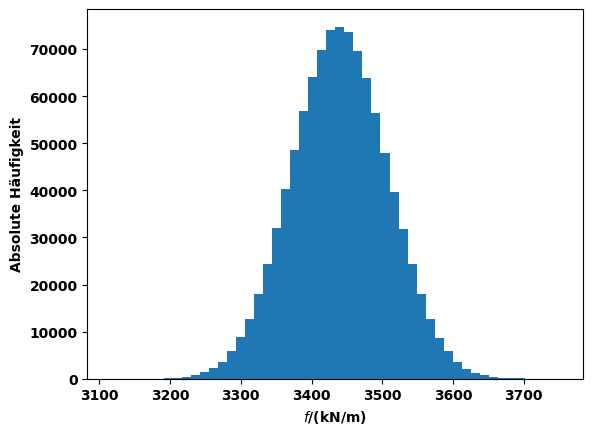

In [11]:
#Histogramm von f
nbins = 50   # Zusammenfassen der Werte in 50 Teilpakete, erhöhen für bessere Auflösung
plt.hist(f, density = False, bins = nbins)
plt.ylabel('Absolute Häufigkeit')
plt.xlabel('$f$/(kN/m)')

In [12]:
print('Mean value:          ' + str(np.round(np.mean(f))))
print('Standard dev.:       ' + str(np.round(np.std(f))))
print('99% of realisations: ' + str(np.round(np.mean(f)-3*np.std(f))) + '...' + str(np.round(np.mean(f)+3*np.std(f)))) 

Mean value:          3440.0
Standard dev.:       67.0
99% of realisations: 3238.0...3642.0


In [13]:
#Änderung der durchschnittlichen Federsteifigkeit
d  = np.round(np.mean(c)) - np.round(np.mean(f))
r = d/np.mean(c)*100
print(f"Die durchschnittliche Federsteifigkeit sinkt um {d} kN/m bzw. um {round(r, 2)} %.'")

Die durchschnittliche Federsteifigkeit sinkt um 160.0 kN/m bzw. um 4.44 %.'


#### Verändert man die Eingangsgröße c3, sodass 160N/mm < 𝑐3 < 200N/mm, liegt nach wie vor eine Normalverteilung vor, jedoch mit leicht geänderten Werten. Der neue Mittelwert liegt bei 3440 kN/m mit einer Standardabweichung von 67 kN/m. 99% der Werte liegen im Intervall 3238 kN/m - 3642 kN/m.
#### Im Vergleich ist zu sehen, dass sowohl Mittelwert als auch Standardabweichung gesunken sind.
#### Obwohl alle Werte immernoch im vorgegebenen Toleranzbereich liegen, ist die durchschnittliche Federsteifigkeit um 160 kN/m bzw. 4,44 % gesunken.

## Aufgabe 2

In [14]:
#Toleranzbänder der geometrischen Eigenschaften
d  = rng.uniform(low = -0.05, high = 0.05, size = P)
h1 = rng.uniform(low = -0.05, high = 0.05, size = P)
h2 = rng.uniform(low = -0.05, high = 0.05, size = P)
l  = rng.uniform(low = -0.05, high = 0.05, size = P)

In [15]:
# Übersetzungsrate des Zylinders  
i = 2.6

In [16]:
# Kraft des Federspeichers Aufgabe 1.a
Fa = 2*i*c*(1+np.sum (h1, axis = 1)+np.sum (h2, axis = 1)+np.sum (l, axis = 1)+np.sum (d, axis = 1))
print('Mean value:          ' + str(np.round(np.mean(Fa))))
print('Standard dev.:       ' + str(np.round(np.std(Fa))))
print('99% of realisations: ' + str(np.round(np.mean(Fa)-3*np.std(Fa))) + '...' + str(np.round(np.mean(Fa)+3*np.std(Fa)))) 

Mean value:          18720.0
Standard dev.:       1174.0
99% of realisations: 15198.0...22243.0


In [17]:
# Kraft des Federspeichers Aufgabe 1.b
Fb = 2*i*f*(1+np.sum (h1, axis=1)+np.sum (h2, axis=1)+np.sum (l, axis=1)+np.sum (d, axis=1))
print('Mean value:          ' + str(np.round(np.mean(Fb))))
print('Standard dev.:       ' + str(np.round(np.std(Fb))))
print('99% of realisations: ' + str(np.round(np.mean(Fb)-3*np.std(Fb))) + '...' + str(np.round(np.mean(Fb)+3*np.std(Fb)))) 

Mean value:          17888.0
Standard dev.:       1091.0
99% of realisations: 14614.0...21162.0


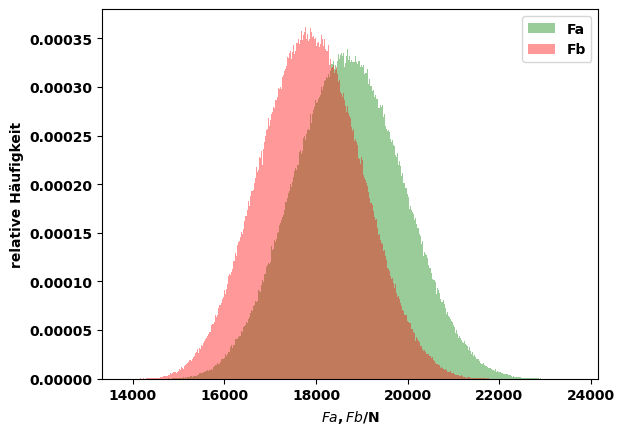

In [18]:
# Verteilungen der Kräfte Fa und Fb
nbins = 500     # Zusammenfassen der Werte in 50 Teilpakete, erhöhen für bessere Auflösung
plt.hist(Fa, density = True, bins=nbins, alpha=0.4, label='Fa', color='green') 
plt.hist(Fb, density = True, bins=nbins, alpha=0.4, label='Fb', color='red')  
plt.ylabel('relative Häufigkeit')
plt.xlabel('$Fa, Fb$/N')
plt.legend()
plt.show()

In [19]:
#Anzahl konformer Werte in Fa
a = np.count_nonzero(Fa > 18000)
a_in_Fa = a / N * 100

print(f"Anzahl der Werte in Fa > 18000N:    {a}")
print(f"Gesamtanzahl der Werte in Fa:       {N}")
print(f"Prozentsatz der Werte Fa > 18000N:  {round(a_in_Fa, 2)}%")

Anzahl der Werte in Fa > 18000N:    723447
Gesamtanzahl der Werte in Fa:       1000000
Prozentsatz der Werte Fa > 18000N:  72.34%


In [20]:
#Anzahl konformer Werte in Fb
b = np.count_nonzero(Fb > 18000)
b_in_Fb = b / N * 100

print(f"Anzahl der Werte in Fb > 18000N:    {b}")
print(f"Gesamtanzahl der Werte in Fb:       {N}")
print(f"Prozentsatz der Werte Fb > 18000N:  {round(b_in_Fb, 2)}%")

Anzahl der Werte in Fb > 18000N:    457908
Gesamtanzahl der Werte in Fb:       1000000
Prozentsatz der Werte Fb > 18000N:  45.79%


In [21]:
#Änderung der konformen Werte aus Aufgabe 1.a und 1.b
dif_konf_F = a-b
Prozent_dif_konf_F = dif_konf_F / N * 100 
print(f"Die Anzahl konformer Einheiten wird um {dif_konf_F} Einheiten bzw. {round(Prozent_dif_konf_F, 2)}% reduziert.")

Die Anzahl konformer Einheiten wird um 265539 Einheiten bzw. 26.55% reduziert.


#### Die zuvor ermittelte Reduktion der Gesamtfedersteifkeit schlägt sich anschließend in der resultierenden Federspeicherkraft nieder. Bei ansonsten unveränderten Eingangsgrößen verschiebt sich die Normalverteilung der Kraft hin zu kleineren Werten und wird "schmaler". 
#### Der Anteil konformer Einheiten sinkt um 26,55 % (von 72,34 % auf 45,79 %) obwohl alle Einzelbauteile weiterhin den Anforderungen entsprechen. Die vergleichsweise kleine Reduktion der Gesamtfedersteifigkeit von 4,44 % führt zu einer Reduktion konformer Einheite um den Faktor 6. Dies zeigt welche hohen Auswirkungen ein systematischer Fehler haben kann.
#### Zur Behebung des Problems wäre es sinnvoll den ursprünglich relativ großen Toleranzbereich der Einzelfedern zu reduzieren, oder falls das nicht möglich ist, eine Qualitätskontrolle der Federpakete einzuführen, welche die minimale Gesamtfedersteifigkeit sicherstellt.